# Lab: Linear Model Selection and Regularization

In this lab we will explore three main topics:

- Methods for selecting the subset of predictors to use in a statistical learning method. This includes best subset selection, forward and backward stepwise selection, and how to use the validation set and cross-validation approaches to choose between models using different numbers of predictors.

- Regularization methods for constraining the sizes of the coefficient estimates in a least squares linear regression model. The two main strategies we will focus on are ridge regression and the lasso.

- Dimension reduction methods to transform the original predictors into a set of variables in a lower-dimensional space before performing least squares regression. The two methods we will focus on are principal components regression and partial least squares.

Throughout the three parts of this lab, we will analyze the `Hitters` dataset from the `ISLR` library, which consists of salary information and a wide variety of statistics for a set of 322 baseball players. In particular, our goal will be to predict a baseball player's salary based on their performance statistics from the previous year. Before diving into the main parts of this lab, we load the `ISLR` library and perform an initial inspection of the `Hitters` data.

In [1]:
library(ISLR)

In [2]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [3]:
dim(Hitters)

[1] 322  20

Looking at the names of the columns, we see that there are a total of 19 variables in addition to the `Salary` variable. As usual, we can learn more about the dataset and the meaning of each column by using the command `?Hitters`. For now, though, we focus on checking the `Salary` column for null values, since that is the variable we wish to use as the response. To check the number of null values in a column, we can use the `is.na()` function in tandem with the `sum()` function.

In [4]:
sum(is.na(Hitters$Salary))

[1] 59

We can also use the `colSums()` function to check for the number of null values in each column.

In [5]:
colSums(is.na(Hitters))

AtBat      Hits     HmRun      Runs       RBI     Walks     Years    CAtBat 
        0         0         0         0         0         0         0         0 
    CHits    CHmRun     CRuns      CRBI    CWalks    League  Division   PutOuts 
        0         0         0         0         0         0         0         0 
  Assists    Errors    Salary NewLeague 
        0         0        59         0

There are 59 players which do not have a value in the `Salary` column, and none of the other columns have null values. Since our goal is to predict a baseball player's salary, we drop the rows which have a missing `Salary` value by using the `na.omit()` function. Note that the `na.omit()` function will drop all of the rows that have missing values in **any** variable.

In [6]:
Hitters = na.omit(Hitters)

In [7]:
dim(Hitters)

[1] 263  20

In [8]:
colSums(is.na(Hitters))

AtBat      Hits     HmRun      Runs       RBI     Walks     Years    CAtBat 
        0         0         0         0         0         0         0         0 
    CHits    CHmRun     CRuns      CRBI    CWalks    League  Division   PutOuts 
        0         0         0         0         0         0         0         0 
  Assists    Errors    Salary NewLeague 
        0         0         0         0

Now that we have dropped the rows with missing values in the `Hitters` data, we can proceed with the rest of the lab.

# Part 1: Subset Selection Methods

In this section, we focus on performing subset selection using the three main strategies discussed in the chapter: best subset selection, forward stepwise selection, and backward stepwise selection. To do this, we will use the `regsubsets()` function from the `leaps` library.

In [9]:
library(leaps)

## Best Subset Selection

First, we use `regsubsets()` to perform best subset selection with the `Hitters` data. Recall that best subset selection follows the following algorithm.

1. Let $\mathcal{M}_0$ denote the *null model*, which contains no predictors. This model simply predicts the sample mean for each observation.

2. For $k = 1, 2, \dots, p$:
    1. Fit all $\binom{p}{k}$ models that contain exactly $k$ predictors.
    2. Pick the best among these $\binom{p}{k}$ models, and call it $\mathcal{M}_k$. Here *best* is defined as having the smallest residual sum of squares (or equivalently the largest $R^2$ value).

3. Select a single best model from among the models $\mathcal{M}_0, \dots, \mathcal{M}_p$ by using cross-validated prediction error, $C_p$ (equivalently Akaike information criterion -- AIC), Bayesian information criterion (BIC), or adjusted $R^2$ value.

Conveniently, the `regsubsets()` function uses the same syntax as `lm()`. The `summary()` command then outputs the best set of variables (i.e. the set of variables which results in the lowest residual sum of squares) for each model size.

In [10]:
regfit.full = regsubsets(Salary ~ ., data = Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

An asterisk indicates that a given variable is included in the corresponding model. For example, the two-variable model which resulted in the lowest RSS is the one using `Hits` and `CRBI` to predict salary. Note that by default, `regsubsets()` only computes up to the best eight-variable model. We can adjust this behavior using the `nvmax` parameter. For instance, we can compute up to the best model using all 19 predictors in the `Hitters` set.

In [11]:
regfit.full = regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
reg.summary = summary(regfit.full)

In order to try and select the best *overall* model, the `summary()` function also returns $R^2$, RSS, adjusted $R^2$, $C_p$, and BIC to help us compare models using different numbers of predictors.

In [12]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

For example, we can compare the $R^2$ value for the best model of each size and see that it increases from 32% for the best single-variable model up to almost 55% for the model using all of the variables. This agrees with our knowledge that the $R^2$ statistic increases monotonically as more variables are included.

In [13]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

Plotting RSS, adjusted $R^2$, $C_p$, and BIC for all of the models at once will help us decide which model to select. Note that we use the parameter `type = "l"` to connect the plotted points with lines.

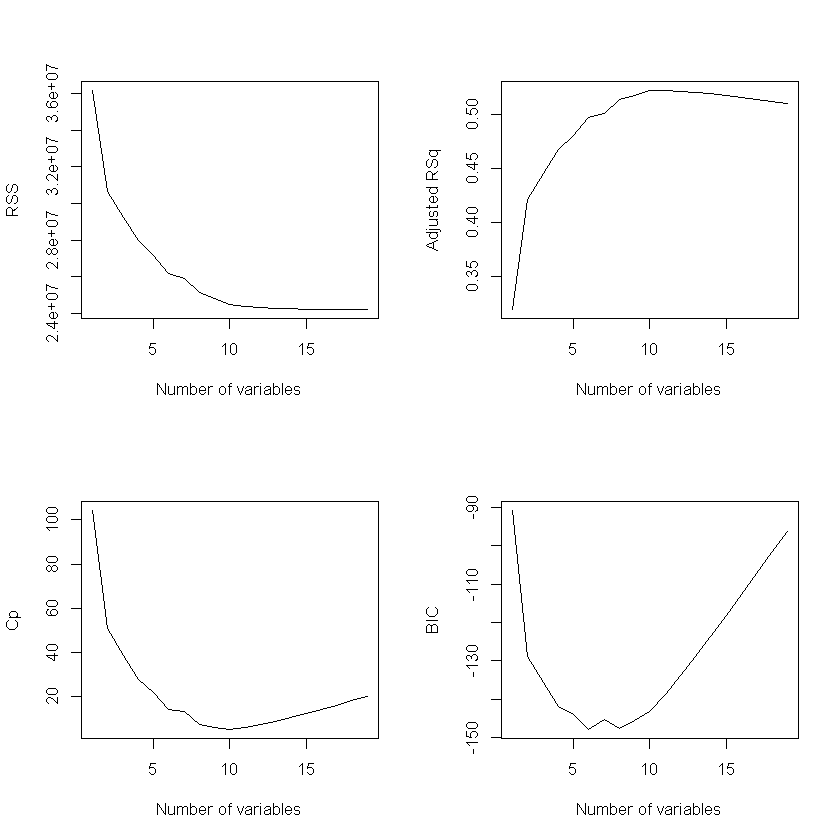

In [14]:
par(mfrow = c(2, 2))
plot(reg.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted RSq", type = "l")
plot(reg.summary$cp, xlab = "Number of variables", ylab = "Cp", type = "l")
plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")

While the plots on their own are helpful for viewing the overall patterns for each statistic as the number of variables increases, it can be helpful to identify the maximum adjusted $R^2$ value and the minimum $C_p$/BIC values and indicate the corresponding models with dots on the graphs. We can identify the index of the maximum or minimum value in a vector using the `which.max()` and `which.min()` functions, and then use the `points()` command to plot a red dot to indicate the model with the best value for each statistic.

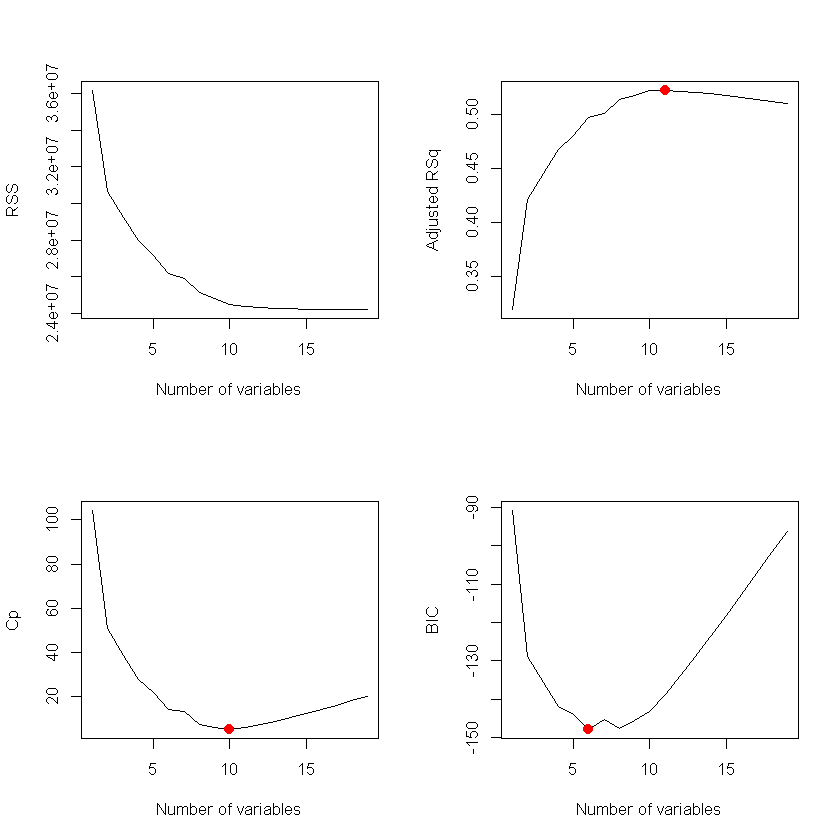

In [15]:
par(mfrow = c(2, 2))
plot(reg.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted RSq", type = "l")
points(which.max(reg.summary$adjr2), max(reg.summary$adjr2), col = "red", cex = 2, pch = 20)
plot(reg.summary$cp, xlab = "Number of variables", ylab = "Cp", type = "l")
points(which.min(reg.summary$cp), min(reg.summary$cp), col = "red", cex = 2, pch = 20)
plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary$bic), min(reg.summary$bic), col = "red", cex = 2, pch = 20)

The `regsubsets()` function also has a built-in `plot()` command which can be used to display the selected variables for the best model with a given nmber of predictors, ranked according to the various statistics used to compare models of different sizes (BIC, $C_p$, adjusted $R^2$, or AIC). The top row of each plot contains a black square for each variable selected according to the optimal model associated with that statistic. For example, the top row of the plot for $R^2$ has a black square for every variable, as expected.

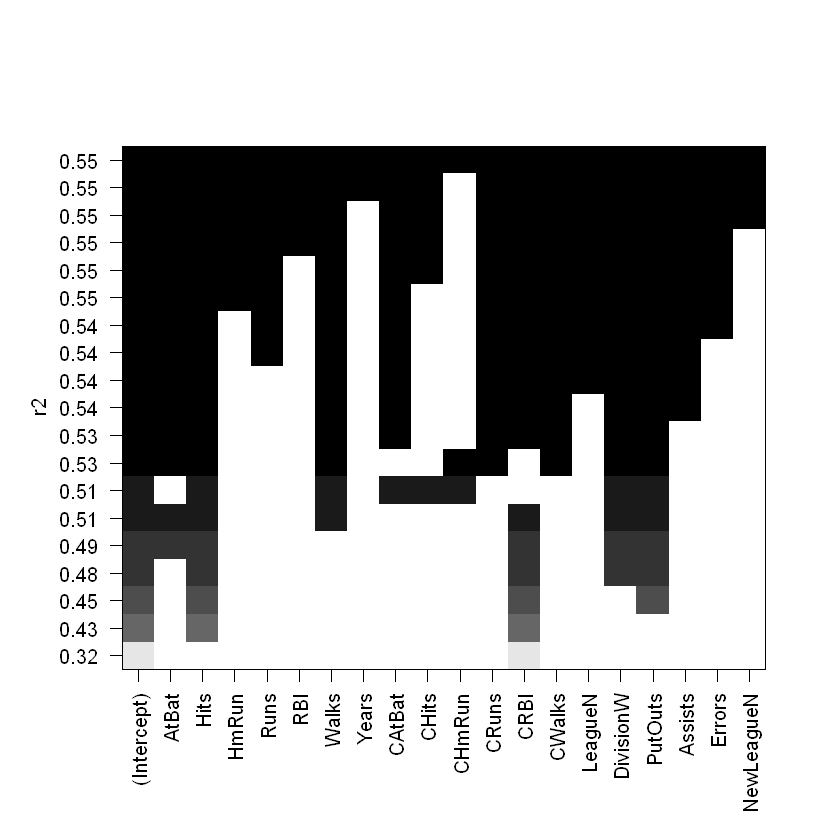

In [16]:
plot(regfit.full, scale = "r2")

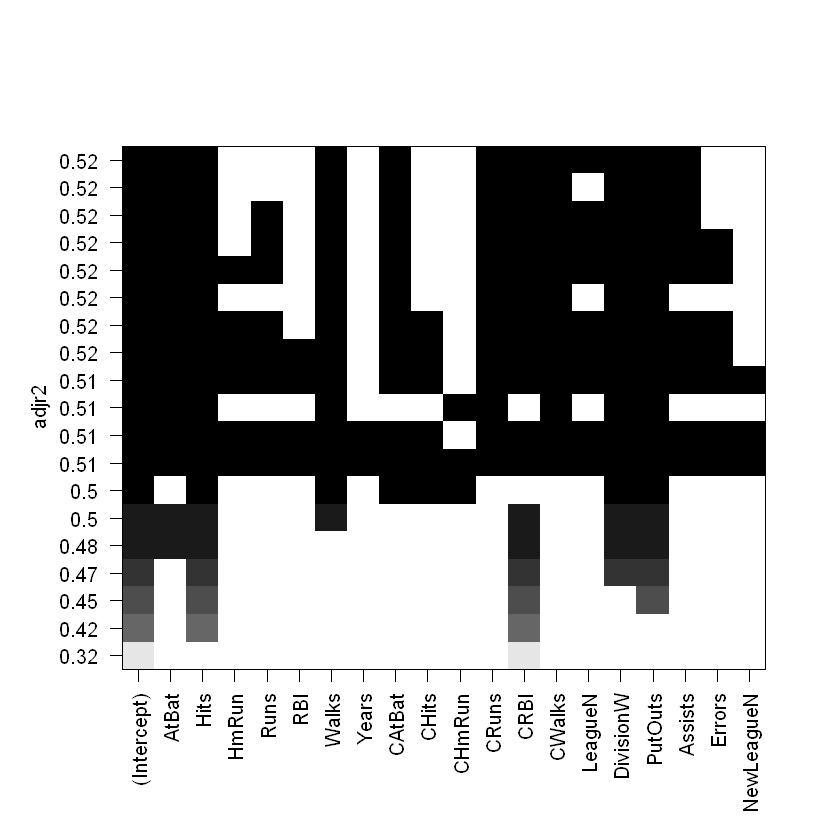

In [17]:
plot(regfit.full, scale = "adjr2")

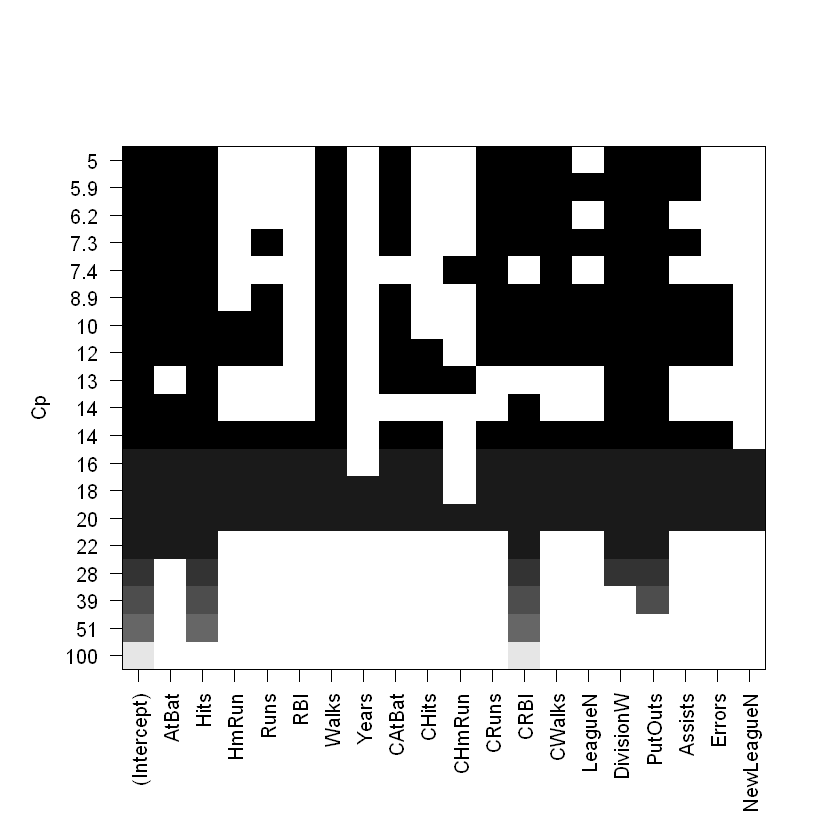

In [18]:
plot(regfit.full, scale = "Cp")

Looking at the plot for BIC, we see that there are several models which have a BIC value of close to -150. The model with the lowest BIC value is the six-variable model that uses `AtBat`, `Hits`, `Walks`, `CRBI`, `DivisionW`, and `PutOuts` to predict `Salary`.

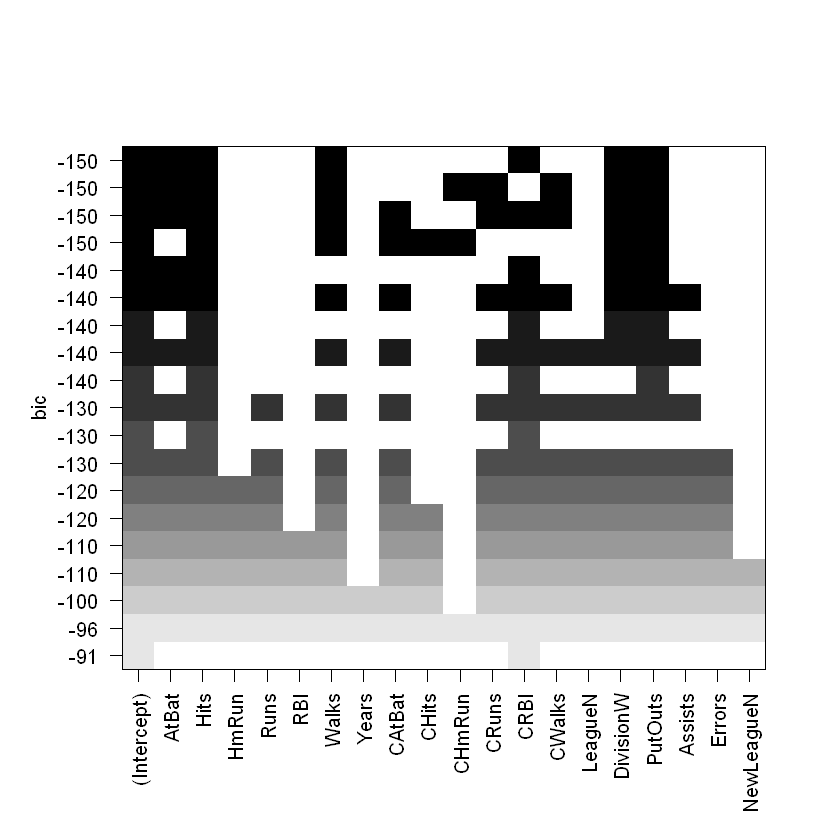

In [19]:
plot(regfit.full, scale = "bic")

If we wish to see the coefficient estimates associated with the best six-variable model, we can use the `coef()` function and pass in the model size as the second parameter.

In [20]:
coef(regfit.full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

## Forward and Backward Stepwise Selection

By supplying the appropriate value to the `method` argument for `regsubsets`, we can also perform forward and backward stepwise selection. Recall that forward stepwise subset selection follows the following algorithm.

1. Let $\mathcal{M}_0$ denote the *null model*, which contains no predictors. This model simply predicts the sample mean for each observation.

2. For $k = 0, 1, \dots, p - 1$:
    1. Consider all $p - k$ models that augment the predictors in $\mathcal{M}_k$ with one additional predictor.
    2. Pick the best among these $p - k$ models, and call it $\mathcal{M}_{k + 1}$. Here *best* is defined as having the smallest residual sum of squares (or equivalently the largest $R^2$ value).

3. Select a single best model from among the models $\mathcal{M}_0, \dots, \mathcal{M}_p$ by using cross-validated prediction error, $C_p$ (equivalently Akaike information criterion -- AIC), Bayesian information criterion (BIC), or adjusted $R^2$ value.

In [21]:
regfit.fwd = regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

With forward stepwise selection, we can see that the best one-variable model uses only `CRBI`, while the best two-variable model uses `CRBI` and `Hits`.

Now that we have performed forward stepwise selection with `regsubsets`, we perform backward stepwise selection. Recall that backward stepwise subset selection follows the following algorithm.

1. Let $\mathcal{M}_p$ denote the *full model*, which contains all $p$ predictors.

2. For $k = p, p - 1, \dots, 1$:
    1. Consider all $k$ models that contain all but one of the the predictors in $\mathcal{M}_k$, for a total of $k - 1$ predictors.
    2. Pick the best among these $k$ models, and call it $\mathcal{M}_{k - 1}$. Here *best* is defined as having the smallest residual sum of squares (or equivalently the largest $R^2$ value).

3. Select a single best model from among the models $\mathcal{M}_0, \dots, \mathcal{M}_p$ by using cross-validated prediction error, $C_p$ (equivalently Akaike information criterion -- AIC), Bayesian information criterion (BIC), or adjusted $R^2$ value.

In [22]:
regfit.bwd = regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


We can check that for this data the best one-variable through six-variable models are identical for best subset and forward stepwise selection. However, we can see that the three methods of variable selection differ for the best seven-variable model.

In [23]:
coef(regfit.full, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [24]:
coef(regfit.fwd, 7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [25]:
coef(regfit.bwd, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Choosing Among Models Using the Validation Set Approach and Cross-Validation

In the previous sections, we saw how to use $C_p$, BIC, and adjusted $R^2$ to choose among a set of models of different sizes. Now we will explore how to do this using a validation set and then using cross-validation.

It is important to note that we must use *only the training observations* to perform all aspects of model fitting in order to obtain accurate estimates of the test error. This includes the step of variable selection. In other words, we use *only the training observations* to pick the best model for each size. If we use the full data set to perform the best subset selection step, then the validation set and cross-validation errors will not be accurate estimates of the test error.

The first step in using the validation set approach is splitting the observations into a training set and a test set. In the previous lab we did this using the `sample()` function to create a vector that corresponds to the indices of the observations in the training set. This vector then was passed to the `subset` argument of our desired estimator function. In this lab we will instead create a boolean mask vector to apply to the `Hitters` data, since `regsubsets()` does not have a `subset` argument. The vector `train` will have a `TRUE` for the observations in the training set and `FALSE` otherwise. The `test` vector is the boolean inverse of the `train` vector -- it will have `TRUE` for observations in the test set and `FALSE` otherwise. To conveniently take the invert a vector of booleans, we can use the `!` command. Note that as usual, we set a random seed to ensure consistency for the training/test set split.

In [26]:
set.seed(1)
train = sample(c(TRUE, FALSE), nrow(Hitters), rep = TRUE)
test = (!train)

Once we have created the mask vectors, we apply `regsubsets()` to the training set in order to perform best subset selection.

In [27]:
regfit.best = regsubsets(Salary ~ ., data = Hitters[train, ], nvmax = 19)

Now we compute the validation set error for the best model of each size. Our first step is to make a model matrix (also known as a design matrix) from the test data. A model matrix is simply a matrix with each row corresponding to an observation and each column corresponding to a predictor or transformation of some number of predictors. This is done using the `model.matrix()` function, which conveniently expands categorical predictors to a set of dummy variables (depending on the encoding) and also expands interaction terms. The `model.matrix()` function supports the usual R formula syntax, so it is quite handy for building an $X$ matrix from data to then use in a regression package.

In [28]:
test.mat = model.matrix(Salary ~ ., data = Hitters[test, ])

In [29]:
head(test.mat)

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alvin Davis,1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Alfredo Griffin,1,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Andre Thornton,1,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,0,0,0
-Alan Trammell,1,574,159,21,107,75,59,10,4631,1300,90,702,504,488,0,0,238,445,22,0
-Buddy Biancalana,1,190,46,2,24,8,15,5,479,102,5,65,23,39,0,1,102,177,16,0
-Bruce Bochy,1,127,32,8,16,22,14,8,727,180,24,67,82,56,1,1,202,22,2,1


With our model matrix in hand, we loop through the models of each size `i`. In each iteration of the loop, we extract the coefficients from `regfit.best` for the best model of size `i`, multiply them against the appropriate columns of the model matrix of test observations to compute the predicted values, and then compute the test mean squared error. Note that in R we perform matrix multiplication using `A %*% B`. If `A` and `B` are matrices, then then this is standard matrix multiplication. If one of `A` or `B` is a vector, then it will be promoted to a row or column vector as necessary to allow for matrix multiplication. Lastly, if `A` and `B` are both vectors, then `A %*% B` is the inner product.

In [30]:
val.errors = rep(NA, 19)
for(i in 1:19){
    coefi = coef(regfit.best, id = i)
    pred = test.mat[, names(coefi)] %*% coefi
    val.errors[i] = mean((Hitters$Salary[test] - pred)^2)
}

In [31]:
val.errors

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

In [32]:
which.min(val.errors)

[1] 7

It turns out that with this train/test split the best model (the one with the lowest test set error) is the one that contains seven variables.

In [33]:
coef(regfit.best, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925

Since we will want to go through this process again when performing cross-validation, we'll combine the above steps into a predict function. Since `regsubsets()` does not have a `predict()` method, this function will serve as that `predict()` method. It will take in three arguments:

- `object`: the output of a call to `regsubsets()`
- `newdata`: a matrix of data
- `id`: an index, which in this case will ultimately correspond to a number of coefficients to use

In [34]:
predict.regsubsets = function(object, newdata, id, ...){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coefi = coef(object, id = id)
    xvars = names(coefi)
    mat[, xvars]%*%coefi
}

Going through the function line by line, it performs the following steps, just as we did by hand earlier.

1. Extract the formula that was used in the call to `regsubsets()`.
2. Create a model matrix (design matrix) from the formula and the data in `newdata`.
3. Extract the coefficients and names of the predictor variables from the model with `id` coefficients
4. Compute the predicted values by multiplying the sub-matrix of the model matrix consisting of just the columns corresponding to the predictors for the model with `id` coefficients against the corresponding coefficients.

Note that functions without a `return()` at the end will automatically return the value of the last evaluated expression. We'll see this function in action a little later when we perform cross-validation to choose between the models of different sizes. For now, we return to finishing up with using the validation set approach.

We saw that with our train/test split the best model (i.e. the one with the lowest test set error) was the one that contained seven variables. Now that we know we want to use the seven-variable model, we perform best subset selection using the *full data set* and select the best seven-variable model. We should use the full data set in order to obtain more accurate coefficient estimates. Also, it is important to note that we do not simply use the seven variables from the model we obtained using the training data. This is because the best model of a given size on the full data may differ from the corresponding model on the training set.

In [35]:
regfit.best = regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
coef(regfit.best, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In fact, we can see that while the best seven-variable model on the training data used the variables `AtBat`, `CRuns`, and `CWalks`, the best seven-variable model on the full data set used the variables `CAtBat`, `CHits`, and `CHmRun` instead.

To wrap up this part of the lab, we use cross-validation to choose between the models of different sizes. This will involve performing best subset selection *within each of the $k$ training sets*, which will require the use of R's clever subsetting syntax to make our lives easier. To start, we create a vector that allocates each observation to one of $k = 10$ folds, and then we create a matrix in which we will store the results. The $i$th row of the `cv.errors` matrix corresponds to the cross-validation errors on the $i$th fold for the best model of each size.

In [36]:
k = 10
set.seed(1)
folds = sample(1:k, nrow(Hitters), replace = TRUE)
cv.errors = matrix(NA, k, 19, dimnames = list(NULL, paste(1:19)))

The next step is to write a for loop that performs cross-validation. In the $i$th fold, the elements of `folds` equal to $i$ are in the test set, while the remainder are in the training set. We then use the `predict.regsubsets()` method we wrote earlier to make predictions for each model size $j$. For each prediction, we compute the test errors on the appropriate subset and store them as the appropriate entry in the `cv.errors` matrix. In other words, the $(i, j)$-entry of `cv.errors` is the test mean squared error on the $i$th cross-validation fold for the best $j$-variable model.

In [37]:
for(i in 1:k){
    best.fit = regsubsets(Salary ~ ., data = Hitters[folds != i, ], nvmax = 19)
    for(j in 1:19){
        pred = predict.regsubsets(best.fit, Hitters[folds == i, ], id = j)
        cv.errors[i, j] = mean((Hitters$Salary[folds == i] - pred)^2)
    }
}

Now that we have our `cv.errors` matrix, we use the `apply()` function to average over the columns in order to obtain a vector for which the $j$th element is the cross-validation error for the $j$-variable model.

In [38]:
mean.cv.errors = apply(cv.errors, 2, mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
149821.1 130922.0 139127.0 131028.8 131050.2 119538.6 124286.1 113580.0 
       9       10       11       12       13       14       15       16 
115556.5 112216.7 113251.2 115755.9 117820.8 119481.2 120121.6 120074.3 
      17       18       19 
120084.8 120085.8 120403.5

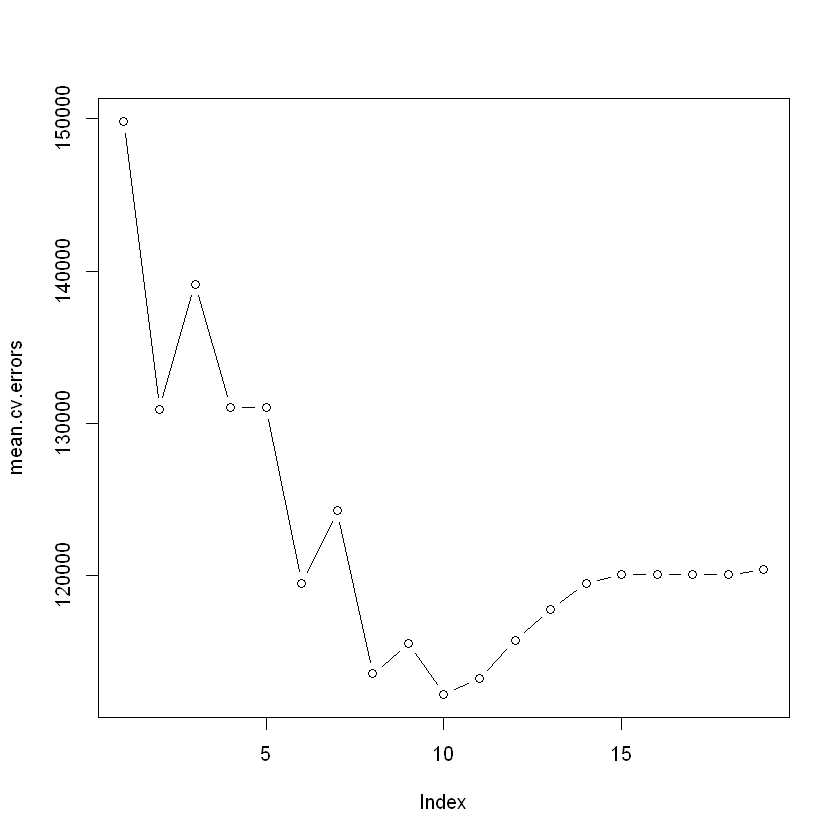

In [39]:
par(mfrow = c(1, 1))
plot(mean.cv.errors, type = "b")

In [40]:
which.min(mean.cv.errors)

10 
10

As we can see in the graph (and also confirm using `which.min()`), a ten-variable model gave the lowest cross-validation error. To wrap up, we perform best subset selection on the full data set in order to obtain the ten-variable model.

In [41]:
reg.best = regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
coef(reg.best, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

# Part 2: Ridge Regression and the Lasso

In this part of the lab, we use the `glmnet` package in order to perform ridge regression and the lasso. The main function we will use from this package is the `glmnet()` function, which can be used to fit ridge regression models, lasso models, and more. More information about the `glmnet` package can be found at the [documentation website](https://glmnet.stanford.edu/). It is important to note that the `glmnet()` function does not support the usual formula syntax `y ~ x` that we have often used with other model-fitting functions. Instead we pass an `x` matrix and a `y` vector. We also note that `glmnet()` can only take numerical, quantitative inputs.

In [42]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



After loading the `glmnet` library, we use the `model.matrix()` function to create our `x`. As discussed in Part 1, the `model. matrix()` function conveniently encodes any qualitative variables using dummy variables. Since we do not wish to pass the `(Intercept)` column that the function automatically creates when passing `x` to `glmnet()` we make sure to exclude it.

In [43]:
x = model.matrix(Salary ~ ., data = Hitters)[, -1]
y = Hitters$Salary

## Ridge Regression

Before using `glmnet()` to perform ridge regression, we recall that the ridge regression coefficient estimates $\hat{\beta}^R$ are the values that minimize

\begin{equation}
    \sum_{i = 1}^n \left( y_i - \beta_0 - \sum_{j = 1}^p \beta_jx_{ij} \right)^2 + \lambda \sum_{j = 1}^p \beta_j^2
    = \text{RSS} + \lambda \sum_{j = 1}^p \beta_j^2,
\end{equation}

where $\lambda \geq 0$ is the tuning parameter that determines the size of the impact of the shrinkage penalty. 

To perform ridge regression using `glmnet()` we pass in the appropriate value to the `alpha` argument. Passing `alpha = 0` will tell `glmnet()` to perform ridge regression while passing `alpha = 1` will tell `glmnet()` to fit a lasso model.

In [44]:
grid = 10^seq(10, -2, length = 100)
ridge.mod = glmnet(x, y, alpha = 0, lambda = grid)

Before moving on to explore the model we fit, we make a few notes regarding the usage of `glmnet()`. First, by default `glmnet()` will peform ridge regression for an automatically selected range of $\lambda$ values, but here we specified to use a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$, which will essentially cover the full range of scenarios from the null model contaiing only the intercept to the least squares fit. Second, we will later compute model fits for particular $\lambda$ values that are not part of the original `grid`. Lastly, we note that by default `glmnet()` standardizes the variables so that they are on the same scale (i.e. have a standard deviation of one). If we do not want `glmnet()` to standardize the variables for some reason, such as if the variable are already all in the same units, we pass the argument `standardize = FALSE`.

For each value of $\lambda$, there is a vector of ridge regression coefficients stored in a matrix that can be accessed using the `coef()` function. In our case, the coefficient matrix is a 20 $\times$ 100 matrix with 20 rows (one for each predictor, plus an intercept) and 100 columns (one for each value of $\lambda$).

In [45]:
dim(coef(ridge.mod))

[1]  20 100

Since the shrinkage penalty in ridge regression is based on the $\ell_2$ norm of the coefficient estimates, we expect that value to be inversely related to the size of $\lambda$. For example, these are the coefficients and their $\ell_2$ norm for $\lambda = 11,498$.

In [46]:
ridge.mod$lambda[50]

[1] 11497.57

In [47]:
coef(ridge.mod)[, 50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

In [48]:
sqrt(sum(coef(ridge.mod)[-1, 50]^2))

[1] 6.360612

To compare, the coefficients for $\lambda = 705$ have a much larger $\ell_2$ norm.

In [49]:
ridge.mod$lambda[60]

[1] 705.4802

In [50]:
coef(ridge.mod)[, 60]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

In [51]:
sqrt(sum(coef(ridge.mod)[-1, 60]^2))

[1] 57.11001

As mentioned previously, we can compute ridge regression coefficient estimates for $\lambda$ values that were not in the original grid. To do so, we pass in our desired value, say $\lambda = 50$, to the `s` argument of the `predict()` function and specify `type = "coefficients"`.

In [52]:
predict(ridge.mod, s = 50, type = "coefficients")[1:20, ]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

Our next step is to split the observations into a training set and a test set in order to estimate the test error of ridge regression and the lasso. In the stepwise subset selection methods section of this lab, we produced a random vector of `TRUE`, `FALSE` elements to use as a boolean mask with `TRUE` corresponding to the training data. The other common approach to splitting the observations is to randomly choose a subset of numbers between 1 and $n$ to use as the indices for the training observations. In this portion of the lab, we'll use the second approach. As always, we set a random seed to ensure reproducibility of the results.

In [53]:
set.seed(1)
train = sample(1:nrow(x), nrow(x)/2)
test = (-train)
y.test = y[test]

With our data split, we first fit a ridge regression model using the training set before computing the mean squared error with the test set. We'll use the arbitrary value of $\lambda = 4$. Note that this time when we use the `predict()` method, we use the `newx` argument to specify that we are computing the predicted values for the test observations.

In [54]:
ridge.mod = glmnet(x[train, ], y[train], alpha = 0, lambda = grid, thresh = 1e-12)
ridge.pred = predict(ridge.mod, s = 4, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 142199.2

Here we obtained a test mean squared error of 142199. To compare, we can consider the case in which we simply fit a model with just an intercept. In that case, our predicted value for each test observation would simply be the mean value of the response for the training observations.

In [55]:
mean((mean(y[train]) - y.test)^2)

[1] 224669.9

In terms of a ridge regression model, this is equivalent to using an extremely large value of $\lambda$, such as $10^{10}$. Note that the two values are not exactly equal due to numerical approximations on the part of `glmnet()`.

In [56]:
ridge.pred = predict(ridge.mod, s = 1e10, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 224669.8

As we can see, using a ridge regression model with $\lambda = 4$ provides a much lower test mean squared error compared to the model with just an intercept. We can also compare to the regular least squares model, which corresponds to $\lambda = 0$. Note that for `glmnet()` to yield the exact least squares coefficients when $\lambda = 0$, we need to use the argument `exact = TRUE` in the `predict()` function. Otherwise, the `predict()` function will interpolate over the grid of $\lambda$ values that was used when fitting the `glmnet()` model, yielding approximate results. Also, the coefficients will still not exactly match the output of `lm()` due to numerical approximation on the back end of `glmnet()`. In general, if we wish to fit a standard (unpenalized) least squares model, we should use `lm()` to have access to outputs for things like standard errors and p-values for the coefficients.

Also note that, as discussed in the [glmnet documentation for `predict()`](https://glmnet.stanford.edu/reference/predict.glmnet.html), when using the argument `exact = TRUE`, we must supply the original `x` and `y`  data using the named arguments `x = ` and `y = ` in order for the workhorse method `predict.glmnet()` to update the model.

In [57]:
ridge.pred = predict(ridge.mod, s = 0, newx = x[test, ], exact = TRUE, x = x[train, ], y = y[train])
mean((ridge.pred - y.test)^2)

[1] 168588.6

In [58]:
lm(y ~ x, subset = train)


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
   274.0145      -0.3521      -1.6377       5.8145       1.5424       1.1243  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
     3.7287     -16.3773      -0.6412       3.1632       3.4008      -0.9739  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    -0.6005       0.3379     119.1486    -144.0831       0.1976       0.6804  
    xErrors  xNewLeagueN  
    -4.7128     -71.0951  


In [59]:
predict(ridge.mod, s = 0, type = "coefficients", exact = TRUE, x = x[train, ], y = y[train])[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 274.0200994   -0.3521900   -1.6371383    5.8146692    1.5423361    1.1241837 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   3.7288406  -16.3795195   -0.6411235    3.1629444    3.4005281   -0.9739405 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  -0.6003976    0.3378422  119.1434637 -144.0853061    0.1976300    0.6804200 
      Errors   NewLeagueN 
  -4.7127879  -71.0898914

To wrap up our discussion of using `glmnet()` to fit ridge regression models, we use cross-validation to help us choose the tuning parameter $\lambda$ instead of arbitrarily choosing a value such as $\lambda = 4$. To do so, we'll use the built-in cross-validation function `cv.glmnet()`. While by default it performs ten-fold cross validation, we can change the number of folds using the `nfolds` argument. Since the choice of cross-validation folds is random, we once again set a random seed to ensure reproducibility of our results.

Note that we are only using our training set in cross-validation to pick the value of $\lambda$.

In [60]:
set.seed(1)
cv.out = cv.glmnet(x[train, ], y[train], alpha = 0)

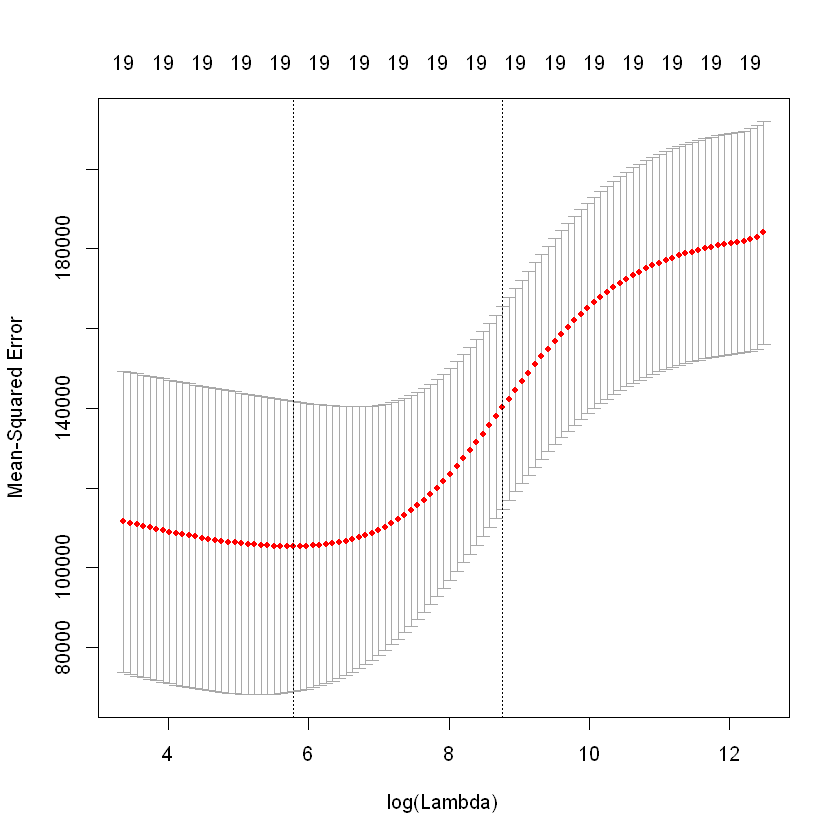

In [61]:
plot(cv.out)

In [62]:
bestlam = cv.out$lambda.min
bestlam

[1] 326.0828

We see that the value of $\lambda$ that results in the smallest cross-validation error for the training set is 326. Now we compute the test mean squared error associated with this value of $\lambda$.

In [63]:
ridge.pred = predict(ridge.mod, s = bestlam, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 139856.6

This is an additional improvement over the test means squared error that we got using $\lambda = 4$. To conclude, we refit our ridge regression model with the full data set, using the value of $\lambda$ that we chose through cross-validation, and examine the coefficient estimates. Note that none of the coefficients are zero -- ridge regression does not perform variable selection!

In [64]:
out = glmnet(x, y, alpha = 0)
predict(out, type = "coefficients", s = bestlam)[1:20, ]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 15.44383135   0.07715547   0.85911581   0.60103107   1.06369007   0.87936105 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.62444616   1.35254780   0.01134999   0.05746654   0.40680157   0.11456224 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.12116504   0.05299202  22.09143189 -79.04032637   0.16619903   0.02941950 
      Errors   NewLeagueN 
 -1.36092945   9.12487767

## The Lasso

In the previous subsection we saw how ridge regression with a good choice of $\lambda$, which we determined through cross-validation, can perform both unpenalized least squares and the null model on the `Hitters` data set. Now we compare the ridge regression model with that obtained through the lasso and see if we can obtain either a more accurate or more interpetable model. 

Recall that the lasso coefficient estimates $\hat{\beta}^L$ are the values that minimize

\begin{equation}
    \sum_{i = 1}^n \left( y_i - \beta_0 - \sum_{j = 1}^p \beta_jx_{ij} \right)^2 + \lambda \sum_{j = 1}^p \lvert \beta_j \rvert
    = \text{RSS} + \lambda \sum_{j = 1}^p \lvert \beta_j \rvert,
\end{equation}

where $\lambda \geq 0$ is the tuning parameter that determines the size of the impact of the shrinkage penalty. The key difference between ridge regression and the lasso is that the former uses an $\ell_2$ penalty while the latter uses an $\ell_1$ penalty.

Fitting a lasso model using `glmnet()` is just like fitting a ridge regression model -- the only difference is that we use the argument `alpha = 1`. We use the same train/test split that we made in the previous subsection.

Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

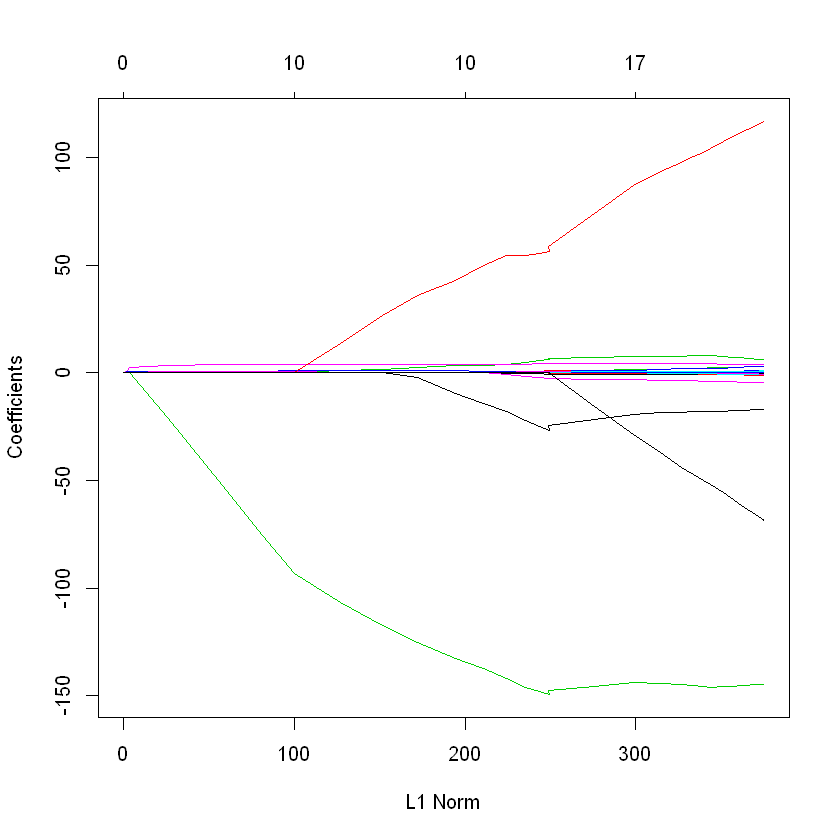

In [65]:
lasso.mod = glmnet(x[train, ], y[train], alpha = 1, lambda = grid)
plot(lasso.mod)

From the coefficient plot, we can see that depending on the choice of tuning parameter, i.e. how large of an $\ell_1$ norm we allow the vector of coefficients $\hat{\beta}$ to have, some of the coeffcients will be exactly equal to zero. Our next step is to perform cross-validation to choose the $\lambda$ which minimizes the cross-validation error and then compute the associated test error.

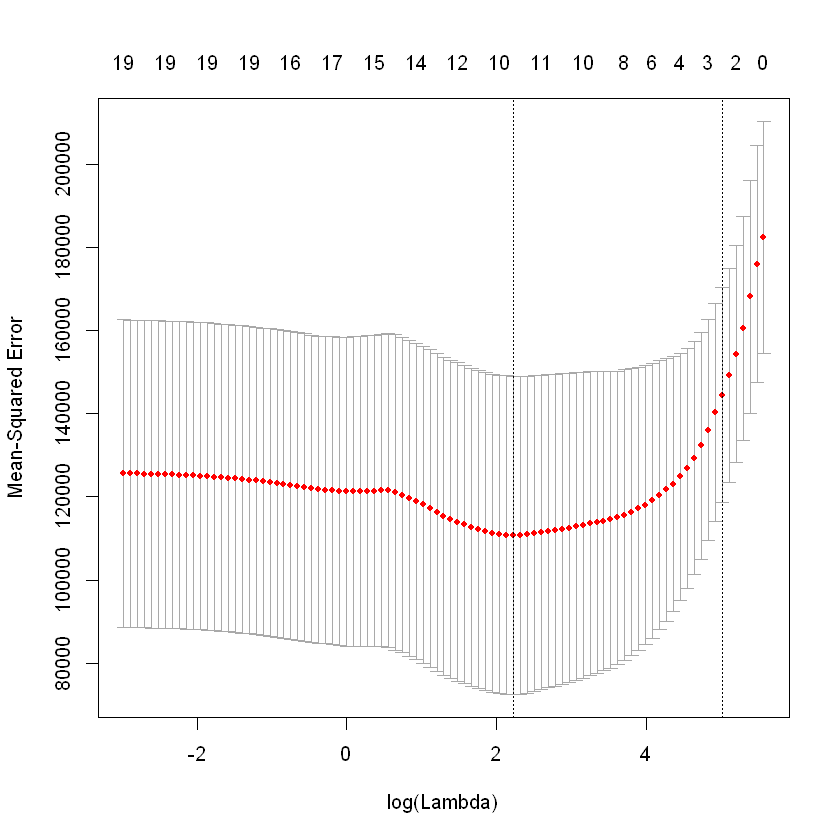

In [66]:
set.seed(1)
cv.out = cv.glmnet(x[train, ], y[train], alpha = 1)
plot(cv.out)

In [67]:
bestlam = cv.out$lambda.min
bestlam

[1] 9.286955

In [68]:
lasso.pred = predict(lasso.mod, s = bestlam, newx = x[test, ])
mean((lasso.pred - y.test)^2)

[1] 143673.6

We see that the value of $\lambda$ that minimizes the cross-validation is lambda is $\lambda = 9.287$. This value of $\lambda$ gives a test mean squared error that of 143674, which is substantially smaller than that for the null model (224670) and unpenalized least squares (168589). It is also comparable to the test mean squared error for ridge regression with the $\lambda$ we chose with cross-validation in the previous subsection (139857).

However, an important advantage that the lasso has over ridge regression is the fact that the resulting coefficient estimates are sparse.

In [69]:
out = glmnet(x, y, alpha = 1)
predict(out, type = "coefficients", s = bestlam)[1:20, ]

(Intercept)         AtBat          Hits         HmRun          Runs 
  -3.04787648    0.00000000    2.02551572    0.00000000    0.00000000 
          RBI         Walks         Years        CAtBat         CHits 
   0.00000000    2.26853781    0.00000000    0.00000000    0.00000000 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.01647106    0.21177390    0.41944632    0.00000000   20.48456543 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-116.59062078    0.23718459    0.00000000   -0.94739923    0.00000000

We see that 10 of the 19 coefficients are exactly zero, so the lasso model with $\lambda$ chosen by cross-validation contains only 9 variables. This smaller model is a lot easier to interpret compared to the ridge regression model.

# Part 3: PCR and PLS Regression

For the final part of this lab, we use the `pls` library ([CRAN page](https://cran.r-project.org/package=pls)) to perform princpal components regression and partial least squares regression, two dimension reduction methods that transform the predictors and then fit a least squares model using the transformed predictors.

In [70]:
library(pls)


Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



Before we actually peform principal components regression and partial least squares regression with the `Hitters` data set, we recall the mathematical underpinnings of dimension reduction. Let our original predictors be $X_1, X_2, \dots, X_p$. The goal of dimension reduction is to appropriately choose linear combinations of the $X_j$, $Z_1, Z_2, \dots, Z_M$, for $M < p$. In other words, for $m = 1, \dots, M$ we pick constants $\phi_{1m}, \phi_{2m}, \dots, \phi_{pm}$ and write

\begin{equation}
    Z_m = \sum_{j = 1}^p \phi_{jm}X_j.
\end{equation}

We then fit the linear regression model

\begin{equation}
    y_i = \theta_0 + \sum_{m = 1}^M \theta_m z_{im} + \epsilon_i, \quad i = 1, \dots, n
\end{equation}

using least squares. The *dimension reduction* aspect comes from the fact that this approach reduces the problem of estimating $p + 1$ coefficients $\beta_0, \beta_1, \dots, \beta_p$ to the simpler problem of estimating $M + 1$ coefficients $\theta_0, \theta_1, \dots, \theta_M$, where $M < p$. 

Note that we can think of linear regression with the linear combinations $Z_m$ as a special case of the original linear regression model $Y = \beta_0 + \beta_1X_1 + \dots + \beta_pX_p + \epsilon$ by plugging the definition of the $Z_m$ into the linear regression formula.
\begin{equation}
    \sum_{m = 1}^M \theta_m z_{im} = 
    \sum_{m = 1}^M \theta_m \sum_{j = 1}^p \phi_{jm} x_{ij} = 
    \sum_{j = 1}^p \sum_{m = 1}^M \theta_m \phi_{jm} x_{ij} = 
    \sum_{j = 1}^p \beta_j x_{ij}, \quad \text{where }
    \beta_j = \sum_{m = 1}^M \theta_m \phi{jm}
\end{equation}

From this perspective, dimension reduction serves as an additional constraint on the estimated $\beta_j$ coefficients, as they must now take the form given above. While such a constraint may bias the coefficient estimates, in situations where the number of predictors $p$ is large relative to the number of observations $n$, selecting a value of $M \ll p$ can greatly reduce the variance of the fitted coefficients. One last thing to note is that if $M = p$ and the $Z_m$ are all linearly independent, then there are no constraints on the form of $\beta_j$ in the above formula and no dimension reduction occurs. Therefore performing least squares with the $Z_m$ is equivalent to performing least squares with the original $p$ predictors $X_j$.

Dimension reduction methods all follow the above strategy, which can be broken down into two main steps. First, obtain the transformed predictors $Z_1, Z_2, \dots, Z_m$, or equivalently the coefficients $\phi_{jm}$ for $j = 1, \dots, p$ and $m = 1, \dots, M$. Second, use the $M$ transformed predictors to fit a model. The key difference between different dimension reduction methods, such as principal components regression and partial least squares regression, lies in the choice of $Z_1, \dots, Z_m$, or equivalently the choice of $\phi_{jm}$.

## Principal Components Regression

In principal components regression, our key underlying assumption is that the directions in which $X_1, \dots, X_p$ show the most variation are the directions that are associated with $Y$. In other words, to choose $Z_1$, we pick $\phi_{j1}$ subject to the constraint $\phi_{11}^2 + \dots + \phi_{p1}^2 = 1$ such that $Z_1 = \phi_{11}X_1 + \dots + \phi_{p1}X_p$ has the largest variance. Note that we include the constraint to disallow the ability of arbitrarily increasing the $\phi_{j1}$ to blow up the variance. We then choose $Z_m$ for $m = 2, \dots, M$ such that $Z_m$ is the linear combination of the variables that is uncorrelated with $Z_1, \dots, Z_{m - 1}$ with the largest variance. The constraint of being uncorrelated with the preceding components is equivalent to being orthogonal to each of the preceding components.

To perform principal components regression, we use the `pcr()` function from the `pls` library. The syntax for `pcr()` is similar to that for `lm()` with few additional options. Here we use the argument `scale = TRUE` to standardize each predictor according to the formula

\begin{equation}
    \tilde{x}_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n} \sum_{i = 1}^n (x_{ij} - \bar{x}_j)^2}}
\end{equation}

to ensure that all predictors are on the same scale, with standard deviation of one, prior to generating the principal components. Note that we may not wish to do this if the predictors are already all measured using the same units. The argument `validation = "CV"` tells `pcr()` to compute the ten-fold cross-validation error for each possible value of $M$, the number of principal components used.

In [71]:
set.seed(2)
pcr.fit = pcr(Salary ~ ., data = Hitters, scale = TRUE, validation = "CV")
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    351.9    353.2    355.0    352.8    348.4    343.6
adjCV          452    351.6    352.7    354.4    352.1    347.6    342.7
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       345.5    347.7    349.6     351.4     352.1     353.5     358.2
adjCV    344.7    346.7    348.5     350.1     350.7     352.0     356.5
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        349.7     349.4     339.9     341.6     339.2     339.6
adjCV     348.0     347.7     338.2     339.7     337.2     337.6

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

The first thing when note when looking at the summary output is that the cross-validation scores are reported using *root mean squared error*. In order to obtain the mean squared error that we are used to using, we simply square the value. For example, a root mean squared error of 351.9 for one component corresponds to a mean squared error of $351.9^2 = 123833$.

We can also plot the cross-validation scores using the `validationplot()` function. Supplying the argument `val.type = "MSEP"` tells the function to plot the mean squared error.

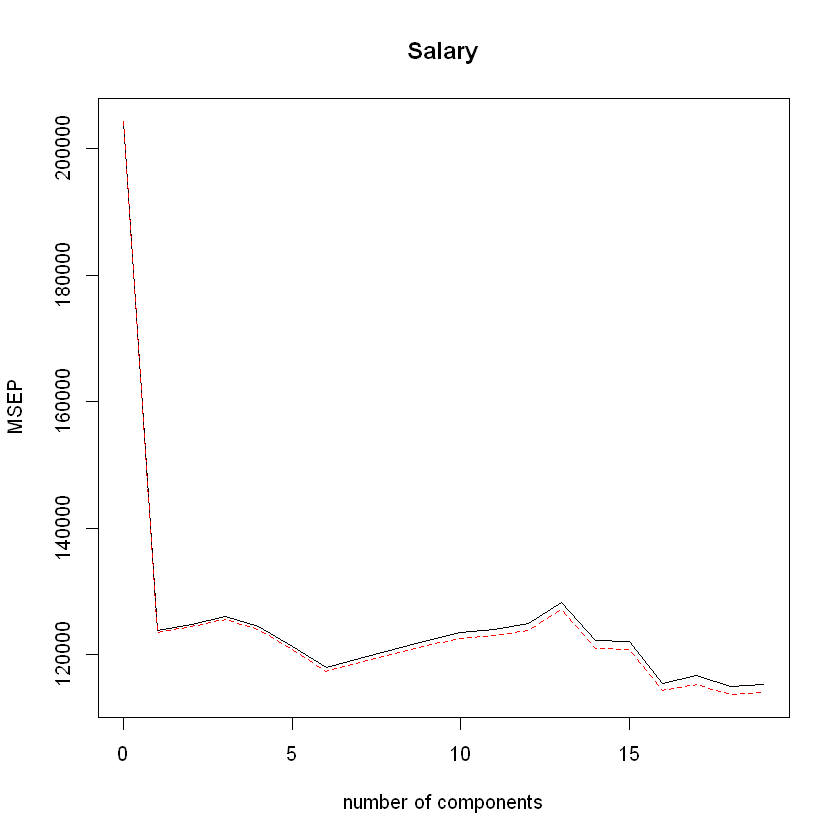

In [72]:
validationplot(pcr.fit, val.type = "MSEP")

Between the summary output and the plot of cross-validation scores, we see that the smallest cross-validation error occurs when $M = 16$ components are used. This isn't much smaller than $M = 19$, which is simply performing regular least squares regression. However, the summary output and plot indicate that $M = 6$ gives a cross-validation error that isn't much worse than $M = 16$, suggesting that a model with fewer components still might suffice.

One other value that the summary output includes is the *percentage of variance explained* in the predictors and response for each number of components. We'll learn more about the concept in Chapter 10 when we discuss principal components analysis in depth, so for now we'll think of this number as the amount of information capture about the predictors or response that is captured using $M$ principal components. For example, $M = 1$ only captures 38.31% of all the variance, or information, in the predictors, while $M = 6$ increases that value to 88.63%. Unsurprisingly, if $M = p = 19$, 100% of the variance in the predictors is captured.

Now that we have explored the basics of how to use `pcr()`, we perform principal components regression on the training data and evaluate its test set performance.

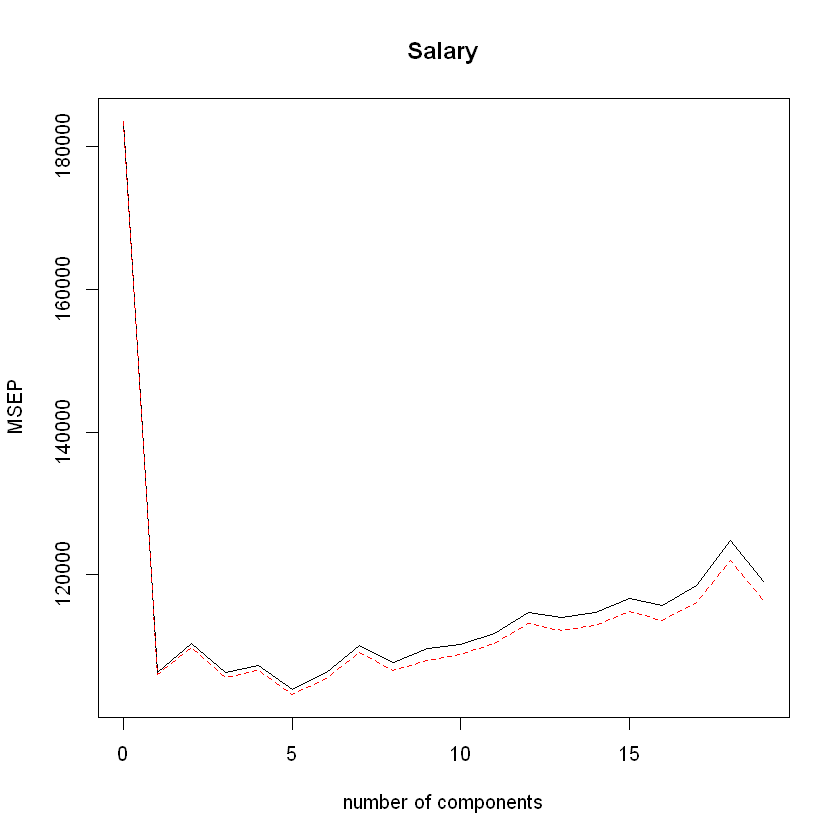

In [73]:
set.seed(1)
pcr.fit = pcr(Salary ~ ., data = Hitters, subset = train, scale = TRUE, validation = "CV")
validationplot(pcr.fit, val.type = "MSEP")

In [74]:
summary(pcr.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           428.3    326.2    332.2    326.2    327.6    322.5    326.2
adjCV        428.3    325.7    331.5    325.1    326.7    321.3    324.9
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       331.9    328.3    331.1     332.1     334.5     338.9     337.7
adjCV    330.3    326.6    328.6     329.9     332.2     336.4     335.1
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        338.7     341.7     340.1     344.2     353.3     345.0
adjCV     336.1     338.9     337.0     340.9     349.3     341.1

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         39.32    61.57    71.96    80.83    85.95    89.99    93.25    95.34
Salary    4

With the training set, we see that the lowest cross-validation error occurs when $M = 5$. Now we compute the test mean squared error.

In [75]:
pcr.pred = predict(pcr.fit, x[test, ], ncomp = 5)
mean((pcr.pred - y[test])^2)

[1] 142811.8

We get a test mean squared error of 142812, which is comparable to that obtained with ridge regression (139857) and that obtained with the lasso (143674). However, because principal components regression involves producing linear combinations of the original predictors, the final model is more difficult to interpret. Even though we used only five principal components compared to the 19 orginal predictors, we did not perform any kind of variable selection, or even directly produce coefficient estimates. To conclude, we fit a principal components regression model on the full data set using $M = 5$, the number of components that we chose through cross-validation.

In [76]:
pcr.fit = pcr(y ~ x, scale = TRUE, ncomp = 5)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps
X    38.31    60.16    70.84    79.03    84.29
y    40.63    41.58    42.17    43.22    44.90


## Partial Least Squares

In contrast to principal components regression, which does not use the response $Y$ to help determine the principal component directions and is therefore an *unsupervised* method, partial least squares takes the response into account as a *supervised* method. Roughly speaking, partial least squares attempts to find directions that help explain both the response and the predictors. After standardizing the $p$ predictors $X_1, \dots, X_p$, partial least squares computes the first direction $Z_1$ by setting $\phi_{j1}$ in the formula

\begin{equation}
    Z_m = \sum_{j = 1}^p \phi_{jm}X_j.
\end{equation}

equal to the coefficient from the simple linear regression of $Y$ onto $X_j$. This coefficient is proportion to the correlation between $Y$ and $X_j$, so in computing $Z_1 = \sum_{j = 1}^p \phi_{j1} X_j$ partial least squares places the highest weight on the variables that are most strongly related to the response.

To identify the second partial least squares direction, we first *adjust* each of the variables for $Z_1$, by regressing each variable on $Z_1$ and taking *residuals*, which can be interpreted as the remaining information that has not been explained by the first partial least squares direction. We then compute $Z_2$ using this *orthogonalized* data in the same fashion as $Z_1$ was computed with the original data. This iterative approach is then repeated to obtain partial least squares components $Z_1, \dots, Z_M$. As with principal components regression, after we have obtained the components $Z_m$, we use least squares to fit a linear model to predict $Y$ using those components. It is important to note, though, that while the supervised dimension reduction of partial least squares can reduce bias, it also has the potential to increase variance. As well will see in the remainder of this lab, this often results in performance that is no better than ridge regression, the lasso, or principal components regression.

To perform partial least squares regression, we use the `plsr()` function from the `pls` library. It uses identical syntax to the `pcr()` function we used in the previous part.

In [78]:
set.seed(1)
pls.fit = plsr(Salary ~ ., data = Hitters, subset = train, scale = TRUE, validation = "CV")
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           428.3    325.5    329.9    328.8    339.0    338.9    340.1
adjCV        428.3    325.0    328.2    327.2    336.6    336.1    336.6
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       339.0    347.1    346.4     343.4     341.5     345.4     356.4
adjCV    336.2    343.4    342.8     340.2     338.3     341.8     351.1
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        348.4     349.1     350.0     344.2     344.5     345.0
adjCV     344.2     345.0     345.9     340.4     340.6     341.1

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         39.13    48.80    60.09    75.07    78.58    81.12    88.21    90.71
Salary 

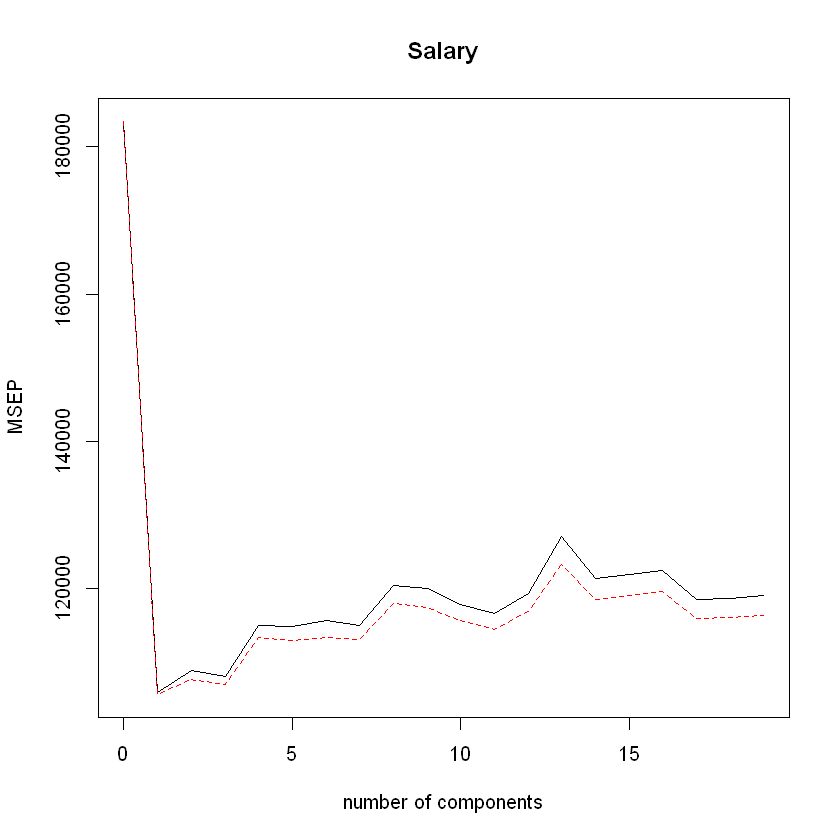

In [79]:
validationplot(pls.fit, val.type = "MSEP")

The lowest cross-validation error occurs when only $M = 1$ partial least squares direction is used, though the errors for $M = 2$ and $M = 3$ are comparable. We now evaluate the test mean squared errors when using $M = 1, 2, 3$.

In [86]:
pls.pred = predict(pls.fit, x[test, ], ncomp = 1)
mean((pls.pred - y[test])^2)

[1] 151995.3

In [87]:
pls.pred = predict(pls.fit, x[test, ], ncomp = 2)
mean((pls.pred - y[test])^2)

[1] 145367.7

In [88]:
pls.pred = predict(pls.fit, x[test, ], ncomp = 3)
mean((pls.pred - y[test])^2)

[1] 152994.6

It appears thet $M = 2$ has the best test mean squared error, 145368. This is comparable to, but slightly higher than that obtained with ridge regression (139857), the lasso (143674), and principal components regression (142812).

To conclude, we perform partial least squares using the full data set, with $M = 2$.

In [89]:
pls.fit = plsr(Salary ~ ., data = Hitters, scale = TRUE, ncomp = 2)
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40


Note that the two-component partial least squares fit explains 46.40% of the variance in `Salary`. In comparison, the final five-component principal components regression fit we obtained explains 44.90% of the variance in in `Salary`. This is due to the difference in methods used to pick components between partial least squares and principal components regression: principal components regression only attempts to maximize the amount of variance explained in the predictors, while partial least squares searches for directions that explain variance in both the predictors and the response.